In [1]:
%cd ..

/home/fedora/Jupyter/river-profiles


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# The `math`-module

## Step Function
Here is the realisation of the conept of [step function](https://en.wikipedia.org/wiki/Step_function).

### step_function
The step function $\nu$ should look like:
$$
\nu(\tau) = 
\begin{cases}
\nu_0,\; \tau < \tau_0 \\
\nu_i,\; \tau_{i-1} < \tau < \tau_i, \; i = 1, ..., k-1\\
\nu_k,\; \tau > \tau_k
\end{cases}
$$
We can use the `step_function` from the `math`-module to calculate

    Parameters:
    -----------
    x : float or float array
        The argument of the function
    
    borders : list of floats len N
        The points, when the function changes the value
    
    values: list of floats len N+1
        values[0] corresponds to the function value before borders[0]
        values[i] corresponds to the function value between borders[i-1] and borders[i]
        
    Returns:
    --------
    r : float or float array shape x.shape

### step integral


For $\tau$ such that $\tau_i \leq \tau < \tau_{i+1}$ the integral of stair function $\nu$ will be:
$$
\int\limits_{\tau_0}^\tau \nu(t) dt = \sum\limits_{j=1}^i \nu_j(\tau_j - \tau_{j-1}) + \nu_{i+1}(\tau - \tau_i)
$$
to calculate $\int\limits_{t_0}^{t_1} \nu(t) dt$ using the `step_integral` from the `math`-module

    Parameters:
    -----------
    x : float or float array
        The argument of the function
    
    borders : list of floats len N
        The points, when the function changes the value
    
    values: list of floats len N+1
        values[0] corresponds to the function value before borders[0]
        values[i] corresponds to the function value between borders[i-1] and borders[i]
        
    negative_backward: bool
        Set I(x0, x1) = -I(x1, x0) for cases, when x0 > x1 
        
    Returns:
    --------
    r : float or float array shape x.shape

In [3]:
from src.math import step_function, step_integral

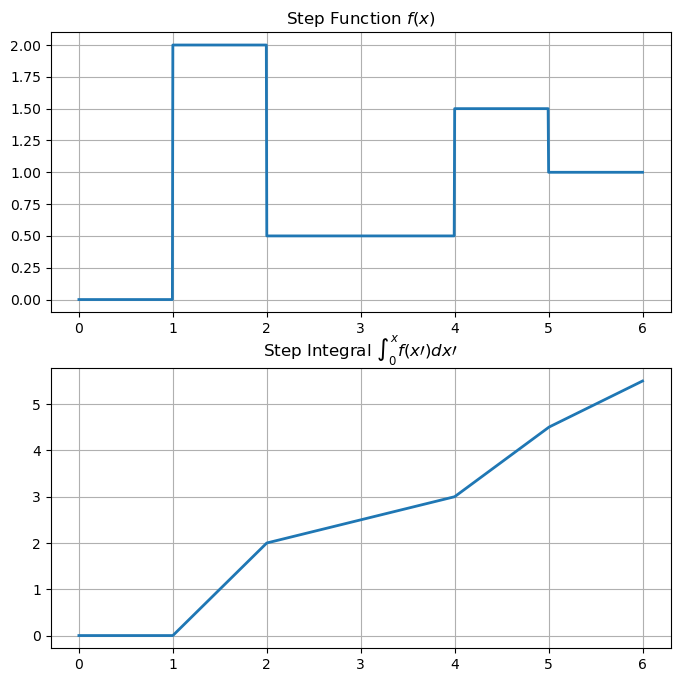

In [4]:
# define the step borders and values
borders = [1, 2, 4, 5]
values = [0, 2, 0.5, 1.5, 1]

x = np.linspace(0, 6, 1201)

# find the step function values
yf = step_function(x, borders, values) 

# find the definie integral of step function in the area [0, x]
yi = step_integral(0, x, borders, values) 

# plot the result
fig, axs = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0].set_title('Step Function $f(x)$')
axs[0].plot(x, yf, linewidth=2)
axs[1].set_title(r'Step Integral $\int_0^x f(x\prime)dx\prime$')
axs[1].plot(x, yi, linewidth=2)
axs[0].grid(True)
axs[1].grid(True)
plt.show()

We alco can use these functions for many dimensional `x0` and `x1`.

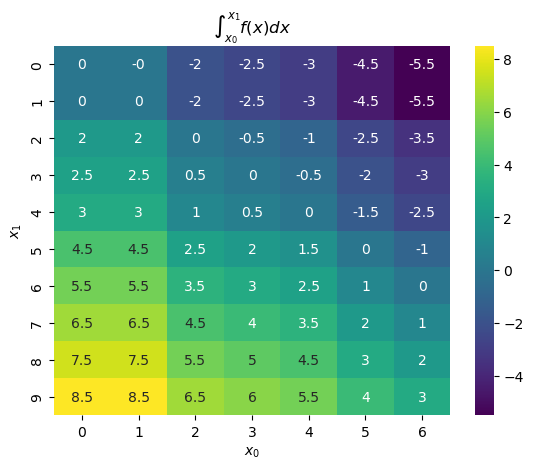

In [5]:
# define 2-dimensional x0 and x1
x0 = np.arange(7)
x1 = np.arange(10)
x0, x1 = np.meshgrid(x0, x1)


# find the definie integral of step function in the area [x0, x1]
int_vals = step_integral(x0, x1, borders=borders, values=values) 

# plot the result
plt.title(r'$\int_{x_0}^{x_1} f(x) dx$')
sns.heatmap(pd.DataFrame(data=int_vals, 
                         columns=pd.Index(x0[0], name='$x_0$'), 
                         index=pd.Index(x1[:, 0], name='$x_1$')), 
            annot=True, cmap='viridis')
plt.show()

## `solve_bisect`
To find the solution of nonlinear equation $f(x) = 0$ where $f(x)$ is monotonic on the area $[x_0, x_1]$ and $f(x0)$ and $f(x_1)$ have different signs we can use the [Bisection recursive solve method](https://en.wikipedia.org/wiki/Bisection_method), realised in the `solve_bisect` function of `math`-module:

    Parameters:
    -----------
    f : function, takes float or np.array as argument
    
    x0, x1: float or np.array same shape, as f-argument should be
    
    xtol: float
        The calculation will terminate if the relative error between two consecutive iterates is at most xtol.
    
    maxiter: int
        Maximal number of iterations
    
    iteration : int
        Iteration number
    
    Returns:
    --------
    float or np.array same shape, as x0 and x1

In [6]:
from src.math import solve_bisect

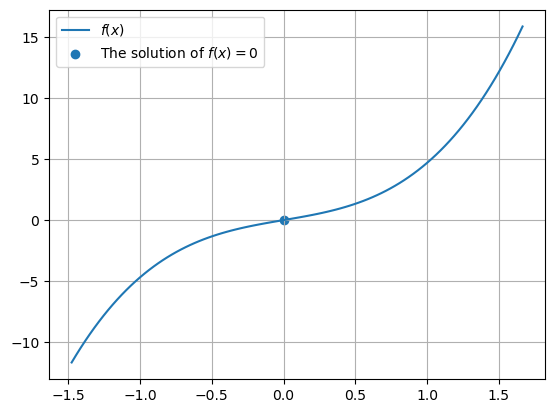

In [7]:
# The monotonic unction on some area
f = lambda x: 2*np.cos(x - 0.5*np.pi) + 3*x**3

# define area borders
x0 = +0.53*np.pi
x1 = -0.47*np.pi

# find the solution
x = solve_bisect(f, x0, x1)

# plot the function and the solution
plt.plot(np.linspace(x0, x1, 100), f(np.linspace(x0, x1, 100)), label='$f(x)$')
plt.scatter(x, 0, label='The solution of $f(x)=0$')
plt.grid(True)
plt.legend()
plt.show()

We also can use this function with higher dimensional tensors, containing nan-values (nan-values will be ignored)

In [8]:
# define the x0 and x1 as arrays with nan-values
x0 = +np.pi/2*np.linspace(0.1, 0.9, 10) - 0.1
x1 = -np.pi/2*np.linspace(0.1, 0.9, 10) 
x0 = np.append(x0, 1.7)
x1 = np.append(x1, np.nan)

# find the solution
x = solve_bisect(f, x0, x1)

# the table of solutions
pd.DataFrame({'x0': x0, 'x1': x1, 'x': x, 'f(x)': f(x)})

,x0,x1,x,f(x)
0,0.057080,-0.157080,3.026235e-10,6.052471e-10
1,0.196706,-0.296706,-1.863576e-10,-3.727151e-10
2,0.336332,-0.436332,5.129108e-10,1.025822e-09
3,0.475959,-0.575959,1.463914e-09,2.927829e-09
4,0.615585,-0.715585,-1.803810e-09,-3.607620e-09
5,0.755211,-0.855211,-2.215905e-09,-4.431811e-09
6,0.894838,-0.994838,2.489008e-09,4.978015e-09
7,1.034464,-1.134464,-1.678419e-09,-3.356838e-09
8,1.174090,-1.274090,-1.165246e-09,-2.330492e-09
9,1.313717,-1.413717,-3.052992e-09,-6.105984e-09


# The `SlopePatches` class of `slope_patches`-module

The slope patches are needed to understand the evolution of river profiles, given by formula
$$
\cfrac{\partial\lambda}{\partial\tau} + (\cfrac{\partial\lambda}{\partial\chi})^n = \nu(\tau, \chi)
$$
where the function $\nu$ is $\chi$-independent step function.

The concept of slope patches is described in the [article](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/jgrf.20031) by Leigh Royden and J. Taylor Perron.

The `SlopePatches` object is the tool to work with slope patches: understanding the parameters of distinct patches and stretch zones, and calculating the elevation of the river.

In [9]:
from src.slope_patches import SlopePatches

## `SlopePatches`-parameters and `SlopePatches.__init__`

The parameters of the `SlopePatches` class are similar to `__init__`-arguments:

    Atributes:
    ----------
    patch_starts - float array length N > 0 (let N be the number of patches; It's not used in code itself)
        The times tau_i, when i-th patch starts
    
    uplift_rates - float array length N
        The values nu_i, uplift rate of the i-th patch (correspondes tau between tau_i and tau_{i+1})

    n - float
        The exponent on channel slope

## `SlopePatches.count`
Thie method returns the number of patches `len(patch_starts)`. Let's call this number $N$.

In [10]:
# define the patches starts, the corresponding uplift rates and the exponent on channel slope
patch_starts = [0.0, 1.0, 5.0, 8.5]
uplift_rates = [2.1, 0.4, 1.9, 0.6]
n = 0.67
n - 1.33

# create SlopePatches object
slp = SlopePatches(patch_starts, uplift_rates, n)

# look at the number of patches
N = slp.count()
print(f'The number of patches is {N}')

assert N == len(patch_starts)
assert N == len(uplift_rates)

The number of patches is 4


## Slopes
The $i$-th slope patch should be a segment of solution of an equation, associated with period $[\tau_i, \tau_{i+1})$, corresponding uplift rate $\nu_i$ and the slope value $\sigma_i = \nu_i^{1/n}$.

We can get this values using `SlopePatches.get_slopes`-method.

In [11]:
slp.get_slopes()

array([3.02638601, 0.25471803, 2.60645452, 0.4665331 ])

## Theoretical Patch Spatial Borders 
The slope patch should is given by its borders. The right border is associated with the equation (B7) form the article by Leigh Royden and J. Taylor Perron:
$$
\chi_{R, i}(\tau) = n\nu_i^{(n - 1)/n} (\tau_i)
$$
If we suppose, that the first patch correspond the initial value, we should set $\chi_{R, 0} = +\infty$.

I'll realise right border $\chi_{R, i}$ caluculation in the `SlopePatches.get_rights` method.

To define left brders we can easily define the spatial length of patch by taking their right border in the maximal time moment corresponding to the patch:
$$
\Delta_i = \chi_{R, i}(\tau_{i+1}) = n\nu_i^{(n - 1)/n} (\tau_{i+1} - \tau_i)
$$
so the left border will be:
$$
\chi_{L, i}(\tau) = \chi_{R, i}(\tau) - \Delta_i
$$

I'll realise spatial patch length $\Delta_i$ in the `SlopePatches.get_lengths` method, and left border $\chi_{L, i}$ caluculation in the `SlopePatches.get_lefts` method.


In [12]:
# define the moment of tau
tau = 6

# calculate left theoretical borders of patches
chi_l = slp.get_lefts(tau)
# calculate right theoretical borders of patches
chi_r = slp.get_rights(tau)

# represent the result as a table
pd.DataFrame({'Left': chi_l, 'Right': chi_r})

,Left,Right
0,2.324555,inf
1,1.052144,5.260719
2,0.000000,0.488403
3,NaN,NaN


We also can calculate theoretical left and right patch borders for an array of times

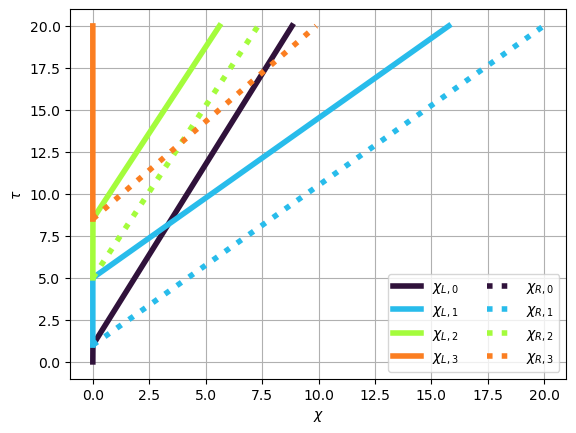

In [13]:
# define the moments of tau
tau = np.arange(-2, 20, 0.01)

# calculate left theoretical borders of patches
chi_l = slp.get_lefts(tau)
# calculate right theoretical borders of patches
chi_r = slp.get_rights(tau)

# plot
for i in range(slp.count()):
    color = cm.turbo(i/slp.count())
    plt.plot(chi_l[i], tau, linewidth=4, linestyle='-', color=color, label=f'$\chi_{{L, {i}}}$')
for i in range(slp.count()):
    color = cm.turbo(i/slp.count())
    plt.plot(chi_r[i], tau, linewidth=4, linestyle=':', color=color, label=f'$\chi_{{R, {i}}}$')
plt.legend(ncol=2)
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\tau$')
plt.grid(True)
plt.show()

## Patches Elevation
The evaluation of the patch $i$ is given in the equation (B4) form the article by Leigh Royden and J. Taylor Perron:
$$
\lambda_i(\tau, \chi) = \chi\sigma_i + \int\limits_{\tau_i}^\tau [\nu(t) - \nu_i]dt
$$
where $\chi_{L, i} \le \chi < \chi_{R, i}$.

I'll reslise evaluation $\lambda_i(\tau, \chi)$ in the `SlopePatch.get_elevation_for_patches` method.

        Returns the elevation for each patch for moments tau in spatial points chi for patches given by index
        Associated with the equation (B4) form the article by Leigh Royden and J. Taylor Perron
        
        If index is None
        Returns the elevation for each patch for moments tau in spatial points chi
        
        Parameters:
        -----------
        tau : float or float array
            The (dimensionless) time argument
        
        chi : float or float array
            The (dimensionless) distance argument
            tau and chi should be the same shape
        
        index : int, int array or None
            The patches indices
            Should be the same shape as tau and chi
            If it's None, then this will be changed to array shape (N, *tau/chi.shape)
            where index[i] == i
            
        filter_outer : bool
            Remove the elements out of theoretical patch borders, if it's True
            
        Returns:
        --------
        lam : float array shape same as index.shape
            The elevation throught the time moments tau, spatial points for the patch from patch_index 


In [14]:
tau = 4
chi = 1
index = 1

elevations_for_patch_1 = slp.get_elevations_for_patches(tau, chi, index)
print(f'lam_{index}(tau={tau}, chi={chi}) = {elevations_for_patch_1}')

elevations_for_patches = slp.get_elevations_for_patches(tau, chi)
print(f'lam_i(tau={tau}, chi={chi}) = {elevations_for_patches}')



lam_1(tau=4, chi=1) = 0.2547180307803491
lam_i(tau=4, chi=1) = [       nan 0.25471803        nan        nan]


elevations_for_patches.shape = (4, 100, 100)


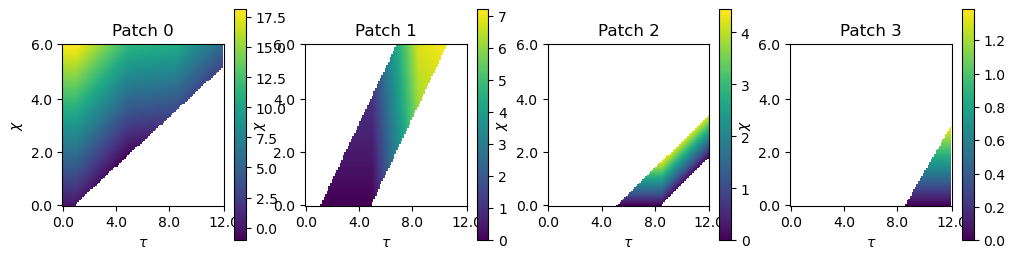

In [15]:
# generate 2-dimensional tau and chi
tau = np.linspace(0, 12, 100)
chi = np.linspace(0, 6, 100)
tau, chi = np.meshgrid(tau, chi)

# find elevations for patches
elevations_for_patches = slp.get_elevations_for_patches(tau, chi)

print(f'elevations_for_patches.shape = {elevations_for_patches.shape}')

# plot the patches
fig, axs = plt.subplots(1, slp.count())
fig.set_figheight(3)
fig.set_figwidth(12)

nticks = 4
xticks = np.linspace(0, len(tau[0]), nticks).astype(int)
xlabels = np.round(tau[0][np.linspace(0, len(tau[0]) - 1, nticks).astype(int)], 2)
yticks = np.linspace(0, len(chi[:, 0]), nticks).astype(int)
ylabels = np.round(chi[:, 0][np.linspace(0, len(chi[:, 0]) - 1, nticks).astype(int)], 2)

# plot the patches
for i in range(slp.count()):
    axs[i].set_title(f'Patch {i}')
    im = axs[i].imshow(elevations_for_patches[i], origin='lower')
    plt.colorbar(im)
    axs[i].set_xlabel(r'$\tau$')
    axs[i].set_ylabel(r'$\chi$')
    axs[i].set_xticks(xticks, xlabels)
    axs[i].set_yticks(yticks, ylabels)
plt.show()

## Elevation on patches borders

We also can find the elevation on theoretical borders of the patches by `get_right_elevations` and `get_left_elevations`.

In [16]:
tau = 2

# find right elevations 
lam_right = slp.get_right_elevations(tau)
# find left elevations
lam_left = slp.get_left_elevations(tau)

print(f'Right elevations at the moment tau={tau} are {lam_right}')
print(f'Left elevations at the moment tau={tau} are {lam_left}')

Right elevations at the moment tau=2 are [  inf 0.268   nan   nan]
Left elevations at the moment tau=2 are [-0.293  0.       nan    nan]


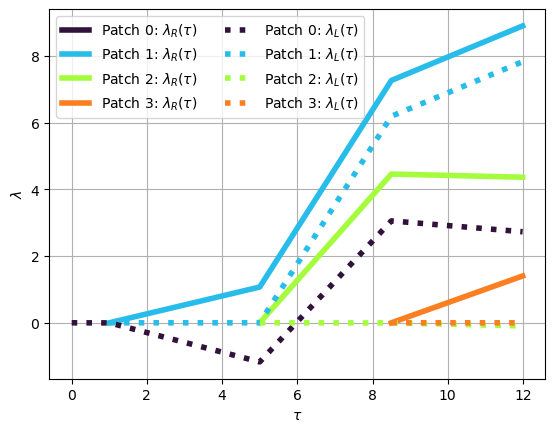

In [17]:
tau = np.arange(-1, 12, 0.01)

# find right elevations 
lam_right = slp.get_right_elevations(tau)
# find left elevations
lam_left = slp.get_left_elevations(tau)

# plot right and left elevations
for i in range(slp.count()):
    color = cm.turbo(i/slp.count())
    plt.plot(tau, lam_right[i], color=color, 
             linestyle='-', linewidth=4,
             label=f"Patch {i}: $\\lambda_R(\\tau)$")
for i in range(slp.count()):
    color = cm.turbo(i/slp.count())
    plt.plot(tau, lam_left[i], color=color, 
             linestyle=':', linewidth=4,
             label=f"Patch {i}: $\\lambda_L(\\tau)$")
plt.grid(True)
plt.legend(ncol=2)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\lambda$')
plt.show()

## Stretch Zones Elevations

Here is the solution by Leigh Royden and J. Taylor Perron given in equation (16b):
$$
\lambda = 
\cfrac{n-1}{n}\left(\cfrac{\chi^n}{n(\tau - \tau_{i+1})}\right)^{\cfrac{1}{n-1}} + 
(\tau - \tau_{i+1})\nu_{i+1} + 
\int\limits_{\tau_{i+1}}^\tau (\nu(t) - \nu_{i+1}) dt
$$
for $n \ne 1$ and $\chi\in(\chi_{R, i}, \chi_{L, i+1})$ or $\chi\in(\chi_{L, i+1}, \chi_{R, i})$.

We can find the elevation over slope patches using `SlopePatch.get_elevations_for_stretch_zones` method.

In [18]:
tau = 8
chi = 2
index = 1

elevations_for_stretch_zone_1 = slp.get_elevations_for_stretch_zones(tau, chi, index)
print(f'lam_{index}(tau={tau}, chi={chi}) = {elevations_for_stretch_zone_1}')

elevations_for_stretch_zones = slp.get_elevations_for_stretch_zones(tau, chi)
print(f'lam_i(tau={tau}, chi={chi}) = {elevations_for_stretch_zones}')



lam_1(tau=8, chi=2) = 4.699924112330552
lam_i(tau=8, chi=2) = [       nan 4.69992411        nan]


elevations_for_stretch_zones.shape = (3, 100, 100)


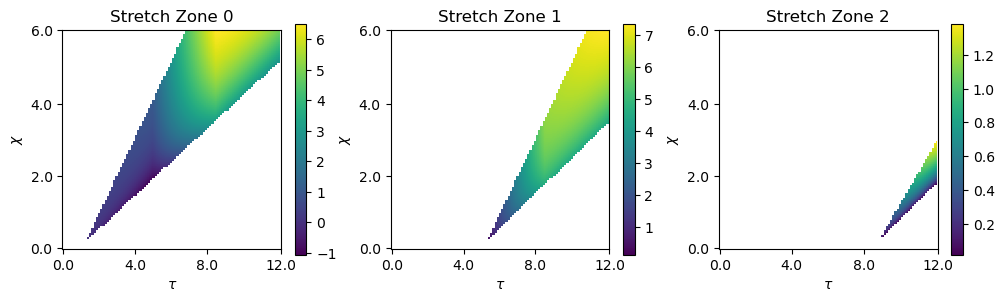

In [19]:
# generate 2-dimensional tau and chi
tau = np.linspace(0, 12, 100)
chi = np.linspace(0, 6, 100)
tau, chi = np.meshgrid(tau, chi)

# find elevations for stretch zones
elevations_for_stretch_zones = slp.get_elevations_for_stretch_zones(tau, chi)

print(f'elevations_for_stretch_zones.shape = {elevations_for_stretch_zones.shape}')

# plot the patches
fig, axs = plt.subplots(1, slp.count() - 1)
fig.set_figheight(3)
fig.set_figwidth(12)

nticks = 4
xticks = np.linspace(0, len(tau[0]), nticks).astype(int)
xlabels = np.round(tau[0][np.linspace(0, len(tau[0]) - 1, nticks).astype(int)], 2)
yticks = np.linspace(0, len(chi[:, 0]), nticks).astype(int)
ylabels = np.round(chi[:, 0][np.linspace(0, len(chi[:, 0]) - 1, nticks).astype(int)], 2)

# plot the patches
for i in range(slp.count() - 1):
    axs[i].set_title(f'Stretch Zone {i}')
    im = axs[i].imshow(elevations_for_stretch_zones[i], origin='lower')
    plt.colorbar(im)
    axs[i].set_xlabel(r'$\tau$')
    axs[i].set_ylabel(r'$\chi$')
    axs[i].set_xticks(xticks, xlabels)
    axs[i].set_yticks(yticks, ylabels)
plt.show()

## The elevation
Generally, the elevation in point $\chi$ for moment $\tau$ should be
$$
\lambda(\tau, \chi)
\begin{cases}
\min \lambda_j(\tau, \chi), \; n \ge 1 \\
\max \lambda_j(\tau, \chi), \; n \le 1
\end{cases}
$$
where $\lambda_j(\tau, \chi)$ is from the set of functions, corresponing the elevation of patches or neighbour patch connections.

We can use `SlopePatches.get_elevation` method, to find the elevation in moment $\tau$ at point $\chi$.

We also can use `SlopePatches.get_elevation_index` method, to understand which patch and stretch zone the final elevation correspond.

In [20]:
tau, chi = 4, 2

# get elevation for tau and chi
lam = slp.get_elevation(tau, chi)

# get elevation index for tau and chi
ilam = slp.get_elevation_index(tau, chi)

print(f'The elevation at moment tau={tau} in the point chi={chi}) is equal to {lam}.')
print(f'This correspods the patch or stretch zone №{ilam}.')

The elevation at moment tau=4 in the point chi=2) is equal to 0.9527720173722303.
This correspods the patch or stretch zone №0.


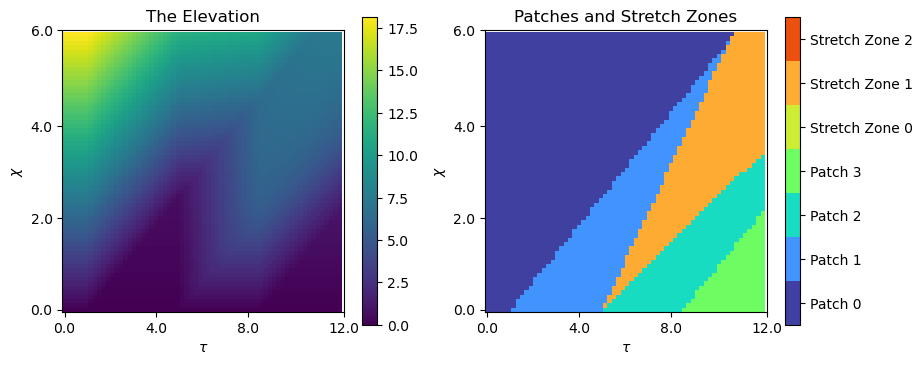

In [21]:
# generate 2-dimensional tau and chi
tau = np.linspace(0, 12, 64)
chi = np.linspace(0, 6, 64)
tau, chi = np.meshgrid(tau, chi)

# get elevation for tau and chi
lam = slp.get_elevation(tau, chi)

# get elevation index for tau and chi
ilam = slp.get_elevation_index(tau, chi)

# plot the elevation and atch-zone distribution
fig, axs = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)

axs[0].set_title('The Elevation')
axs[1].set_title('Patches and Stretch Zones')
im0 = axs[0].imshow(lam, cmap='viridis', origin='lower')
im1 = axs[1].imshow(ilam, cmap='turbo', origin='lower', vmin=-0.5, vmax=2*slp.count() - 0.5)
cbar0 = plt.colorbar(im0)
cbar1 = plt.colorbar(im1, ticks=np.arange(2*slp.count() - 1), boundaries=np.arange(-0.5, 2*slp.count() - 0.5, 1))
cbar1.ax.set_yticklabels(np.concatenate([[f'Patch {j}' for j in range(slp.count())], 
                                         [f'Stretch Zone {j}' for j in range(slp.count() - 1)]]))
nticks = 4
xticks = np.linspace(0, len(tau[0]), nticks).astype(int)
xlabels = np.round(tau[0][np.linspace(0, len(tau[0]) - 1, nticks).astype(int)], 2)
yticks = np.linspace(0, len(chi[:, 0]), nticks).astype(int)
ylabels = np.round(chi[:, 0][np.linspace(0, len(chi[:, 0]) - 1, nticks).astype(int)], 2)
for i in range(2):
    axs[i].set_xlabel(r'$\tau$')
    axs[i].set_ylabel(r'$\chi$')
    axs[i].set_xticks(xticks, xlabels)
    axs[i].set_yticks(yticks, ylabels)
    
plt.show()

## Intersections

...

/home/fedora/Jupyter/river-profiles/src/slope_patches.py:468: RuntimeWarning: invalid value encountered in divide
  chi = ((bk - bj)/(aj - ak))**((self.n - 1)/self.n)
/home/fedora/Jupyter/river-profiles/src/slope_patches.py:320: RuntimeWarning: invalid value encountered in divide
  lam = np.array((self.n - 1)/self.n*(chi**self.n/(tau - tau1)/self.n)**(1/(self.n - 1)))


intersections_pp.shape = (4, 4, 121)
intersections_zz.shape = (3, 3, 121)
intersections_pz.shape = (4, 3, 121)


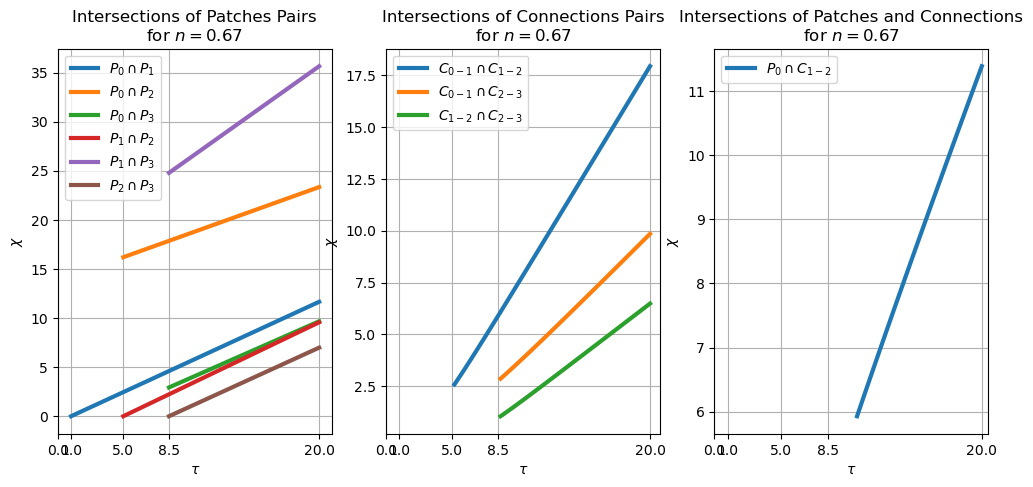

In [22]:
tau_max = 20
tau = np.linspace(0, tau_max, 121)

intersections_pp = slp.get_intersections_of_patches(tau)
intersections_zz = slp.get_intersections_of_stretch_zones(tau)
intersections_pz = slp.get_intersections_of_patches_and_stretch_zones(tau)

print(f'intersections_pp.shape = {intersections_pp.shape}')
print(f'intersections_zz.shape = {intersections_zz.shape}')
print(f'intersections_pz.shape = {intersections_pz.shape}')

eps = 1e-6
assert ((abs(intersections_pp - np.swapaxes(intersections_pp, 0, 1)) < eps)|np.isnan(intersections_pp)).all()
assert ((abs(intersections_zz - np.swapaxes(intersections_zz, 0, 1)) < eps)|np.isnan(intersections_zz)).all()


# plot the intersections
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.set_figheight(5)


axs[0].set_title(f"Intersections of Patches Pairs\nfor $n = {n}$")
axs[1].set_title(f"Intersections of Connections Pairs\nfor $n = {n}$")
axs[2].set_title(f"Intersections of Patches and Connections\nfor $n = {n}$")


for i in range(N):
    for j in range(i+1, N):
        if not np.isnan(intersections_pp[i, j]).all():
            axs[0].plot(tau, intersections_pp[i, j], linewidth=3,
                        label=f'$P_{{{i}}}\cap P_{{{j}}}$')
for i in range(N-1):
    for j in range(i+1, N-1):
        if not np.isnan(intersections_zz[i, j]).all():
            axs[1].plot(tau, intersections_zz[i, j], linewidth=3,
                        label=f'$C_{{{i}-{i+1}}}\cap C_{{{j}-{j+1}}}$')
for i in range(N):
    for j in range(N-1):
        if not np.isnan(intersections_pz[i, j]).all():
            axs[2].plot(tau, intersections_pz[i, j], linewidth=3,
                        label=f'$P_{{{i}}}\cap C_{{{j}-{j+1}}}$')

for i in range(3):
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_xlabel(r'$\tau$')
    axs[i].set_ylabel(r'$\chi$')
    axs[i].set_xticks(np.linspace(0, tau_max, 5))
    axs[i].set_xticks(np.unique(np.concatenate([slp.patch_starts, [0, tau_max]])))
plt.show()

## Realisation borders

We can find the patches and stretch zones realisation bordesr using `SlopePatches.get_patches_relisation_borders` and `SlopePatches.get_stretch_zones_relisation_borders` methods.

In [23]:
tau = 8

# find patches realisation borders
realisation_patches_lefts, realisation_patches_rights = slp.get_patches_relisation_borders(tau)

# find stretch zones realisation borders
realisation_stretch_lefts, realisation_stretch_rights = slp.get_stretch_zones_relisation_borders(tau)

# represent the realisation borders as a table
pd.DataFrame({'Left': np.concatenate([realisation_patches_lefts, realisation_stretch_lefts]), 
              'Right': np.concatenate([realisation_patches_rights, realisation_stretch_rights]),}, 
             index=np.concatenate([np.char.add('Patch ', np.arange(slp.count()).astype(str)), 
                                   np.char.add('Stretch Zone ', np.arange(slp.count() - 1).astype(str))]))

,Left,Right
Patch 0,4.293444,inf
Patch 1,3.156431,4.293444
Patch 2,0.000000,1.465209
Patch 3,NaN,NaN
Stretch Zone 0,NaN,NaN
Stretch Zone 1,1.465209,3.156431
Stretch Zone 2,NaN,NaN


/home/fedora/Jupyter/river-profiles/src/slope_patches.py:468: RuntimeWarning: invalid value encountered in divide
  chi = ((bk - bj)/(aj - ak))**((self.n - 1)/self.n)


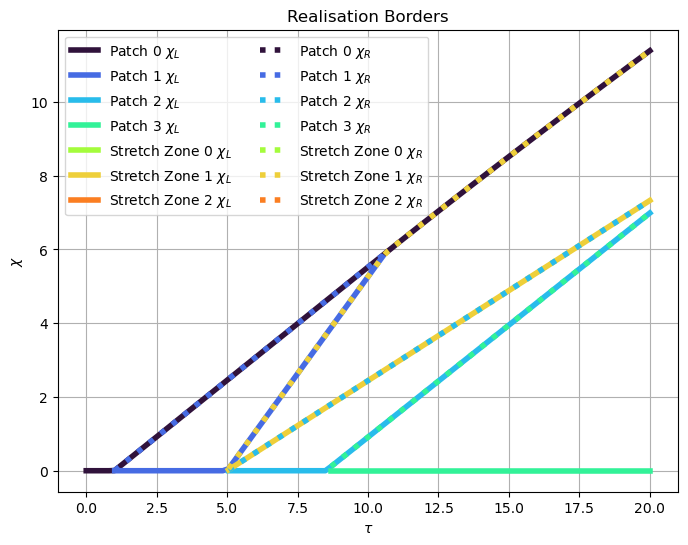

In [24]:
# generate array of moments tau
tau = np.linspace(0, 20, 100)

# find patches realisation borders
realisation_patches_lefts, realisation_patches_rights = slp.get_patches_relisation_borders(tau)

# find stretch zones realisation borders
realisation_stretch_lefts, realisation_stretch_rights = slp.get_stretch_zones_relisation_borders(tau)

# plot the result
plt.figure(figsize=(8, 6))
plt.title('Realisation Borders')
for i in range(slp.count()):
    color = cm.turbo(0.5*i/slp.count())
    plt.plot(tau, realisation_patches_lefts[i], color=color, linewidth=4, linestyle='-', label=f'Patch {i} $\\chi_L$')
for i in range(slp.count() - 1):
    color = cm.turbo(0.5 + 0.5*i/slp.count())
    plt.plot(tau, realisation_stretch_lefts[i], color=color, linewidth=4, linestyle='-', label=f'Stretch Zone {i} $\\chi_L$')
for i in range(slp.count()):
    color = cm.turbo(0.5*i/slp.count())
    plt.plot(tau, realisation_patches_rights[i], color=color, linewidth=4, linestyle=':', label=f'Patch {i} $\\chi_R$')
for i in range(slp.count() - 1):
    color = cm.turbo(0.5 + 0.5*i/slp.count())
    plt.plot(tau, realisation_stretch_rights[i], color=color, linewidth=4, linestyle=':', label=f'Stretch Zone {i} $\\chi_R$')
plt.grid(True)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi$')
plt.legend(ncol=2)
plt.show()

## $\nu$-value
The slope patches are needed to describe the solution of the equation (8) from the [article](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/jgrf.20031):
$$
\cfrac{\partial\lambda}{\partial\tau} + (\cfrac{\partial\lambda}{\partial\chi})^n = \nu(\tau, \chi)
$$

To get the value of $\nu$, defined the `SlopePatches` object,  we can use `SlopePatches.get_nu_value` method:

        Returns the uplift rate (nu-value) for each moment tau.
        Just returns the uplift rate at chi=0, nu(tau, chi=0)
        
        Parameters:
        -----------
        tau : float or float array
            The time argument of the uplift rate function
        
        chi : float or float array
            The spatial argument of the uplift rate function
            The result value does not depend on this argument, 
            but sometimes this function should take 2 paraeters.
        
        rate_before: float or None
            The uplift rate before the first patch starts.
            If it is None, then set rate_before same as rate of 1st patch (patch index 0).
        
        Returns:
        --------
        nu : float or float array
             The uplift rates for moments tau

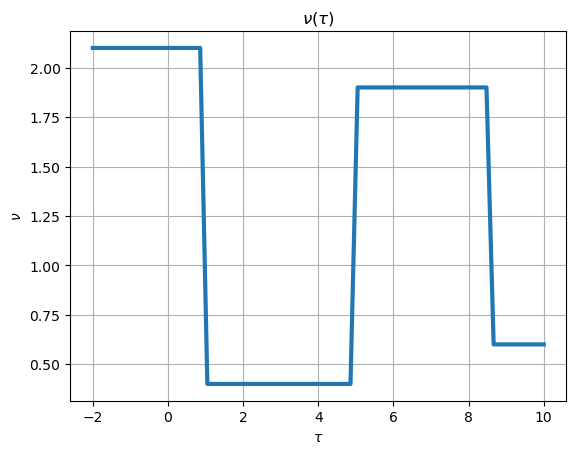

In [25]:
# define tau values
tau = np.linspace(-2, 10, 64)

# find nu(tau)
nu = slp.get_nu_value(tau)

# plot nu function
plt.title(r'$\nu(\tau)$')
plt.plot(tau, nu, linewidth=3)
plt.grid(True)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\nu$')
plt.show()

This method also can take $\chi$ as argument.

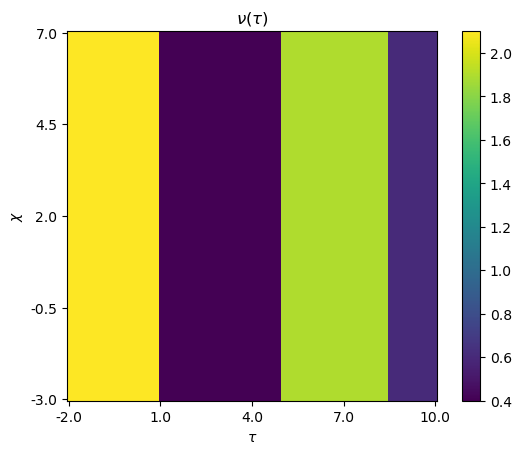

In [26]:
# define tau values
tau = np.linspace(-2, 10, 121)
chi = np.linspace(-3, 7, 121)
tau, chi = np.meshgrid(tau, chi)

# find nu(tau)
nu = slp.get_nu_value(tau, chi)

# plot nu function
plt.title(r'$\nu(\tau)$')
im = plt.imshow(nu, origin='lower')
plt.colorbar(im)
plt.xticks(np.linspace(0, tau.shape[0] - 1, 5), labels=np.linspace(np.min(tau), np.max(tau), 5))
plt.yticks(np.linspace(0, chi.shape[1] - 1, 5), labels=np.linspace(np.min(chi), np.max(chi), 5))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi$')
plt.show()

# Approximation

In [27]:
from src.approximation import approximate
from tqdm.notebook import tqdm

  0%|          | 0/29651 [00:00<?, ?it/s]

sol.shape = (200, 150)
tau.shape = (200, 150)
chi.shape = (200, 150)


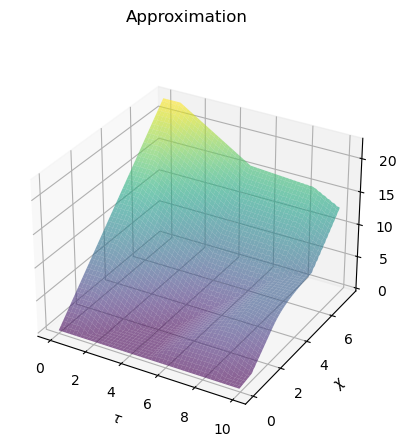

In [28]:
# define the slope eponent
n = slp.n

# define nu, initial and border functions
nu = slp.get_nu_value
initial = lambda chi: chi*slp.get_slopes()[0] # we sopouse, that nu(0) define the initial solution
border = lambda tau: tau*0

# define approximation parameters
dtau = 0.05
ntau = 200
dchi = 0.05
nchi = 150

# we can use the bar to loook at the process
with tqdm(total=(ntau-1)*(nchi - 1)) as bar:
    # approximate the soulution
    sol, tau, chi = approximate(nu, initial, border, n, 
                                dtau=dtau, ntau=ntau, 
                                dchi=dchi, nchi=nchi, 
                                bar=bar)

# print the result shaes
print(f'sol.shape = {sol.shape}')
print(f'tau.shape = {tau.shape}')
print(f'chi.shape = {chi.shape}')

# plot the result
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.suptitle('Approximation')
ax.plot_surface(tau, chi, sol, cmap='viridis', alpha=0.6)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\chi$')
ax.set_zlabel(r'$\lambda$')
plt.show()

/home/fedora/Jupyter/river-profiles/src/slope_patches.py:320: RuntimeWarning: invalid value encountered in divide
  lam = np.array((self.n - 1)/self.n*(chi**self.n/(tau - tau1)/self.n)**(1/(self.n - 1)))


MAE: 0.023872


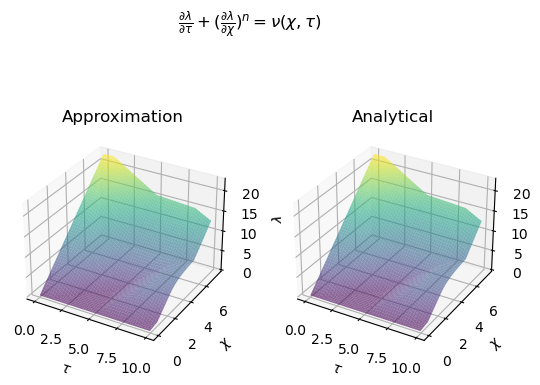

In [29]:
# get theoretical solution to compare
lam = slp.get_elevation(tau, chi)

# find the mean absolute error of analytical and approximated solution
mae = abs(lam - sol).mean()
print(f'MAE: {mae:.6f}')

# plot both solutions
fig, axs = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
fig.suptitle(r'''$\frac{\partial\lambda}{\partial\tau} + (\frac{\partial\lambda}{\partial\chi})^n = \nu(\chi, \tau)$''')
axs[0].set_title('Approximation')
axs[0].plot_surface(tau, chi, sol, cmap='viridis', alpha=0.6)
axs[1].set_title('Analytical')
axs[1].plot_surface(tau, chi, lam, cmap='viridis', alpha=0.6)
for i in range(2):
    axs[i].set_xlabel(r'$\tau$')
    axs[i].set_ylabel(r'$\chi$')
    axs[i].set_zlabel(r'$\lambda$')
plt.show()

## Approximation accuracy

In [30]:
#ns = [0.25, 0.33, 0.5, 0.67, 0.75, 1, 1.25, 1.33, 1.5, 1.67, 1.75, 2, 2.25]
ns = np.arange(0.2, 4.7, 0.2)

bar_outer = tqdm(total=len(ns))
bar_inner = tqdm(total=2*(ntau - 1)*(nchi - 1))

sols1 = []
sols2 = []
lams = []
for n in ns:
    sol1, tau, chi = approximate(nu, initial, border, n, 
                                 dtau=dtau, ntau=ntau, 
                                 dchi=dchi, nchi=nchi, 
                                 bar=bar_inner, order=1)
    sol2, tau, chi = approximate(nu, initial, border, n, 
                                 dtau=dtau, ntau=ntau, 
                                 dchi=dchi, nchi=nchi, 
                                 bar=bar_inner, order=2)
    lam = SlopePatches(patch_starts, uplift_rates, n).get_elevation(tau, chi)
    sols1.append(sol1.copy())
    sols2.append(sol2.copy())
    lams.append(lam.copy())
    bar_outer.update()
    if n != ns[-1]:
        bar_inner.reset()
bar_inner.close()
bar_outer.close()

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/59302 [00:00<?, ?it/s]

/home/fedora/Jupyter/river-profiles/src/approximation.py:77: RuntimeWarning: invalid value encountered in power
  f = lambda sol: sol - sols[j+1, k] - dchi*(nu_val - (sol - sols[j, k+1])/dtau)**(1/n)
/usr/lib64/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/fedora/Jupyter/river-profiles/src/approximation.py:161: RuntimeWarning: invalid value encountered in power
  f = lambda sol: 0.5*(sol - sols[j+1, k] + sols[j, k+1] - sols[j, k])/dchi - (nu_val - 0.5*(sol + sols[j+1, k] - sols[j, k+1] - sols[j, k])/dtau)**(1/n)
/home/fedora/Jupyter/river-profiles/src/approximation.py:74: RuntimeWarning: invalid value encountered in power
  f = lambda sol: sol - sols[j, k+1] + dtau*((sol - sols[j+1, k])/dchi)**n - dtau*nu_val
/home/fedora/Jupyter/river-profiles/src/approximation.py:75: RuntimeWarning: invalid value encountere

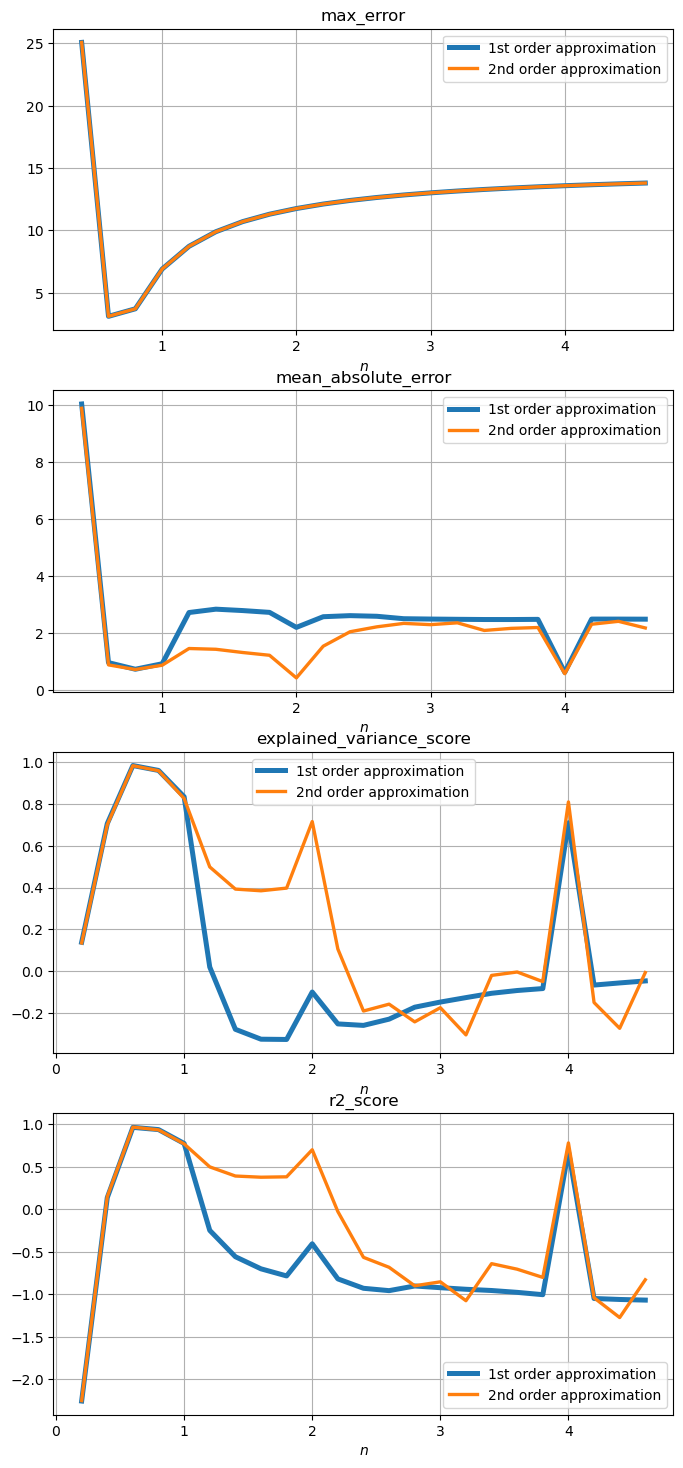

In [31]:
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score, r2_score

scores = [max_error, mean_absolute_error, explained_variance_score, r2_score]

fig, axs = plt.subplots(len(scores))
fig.set_figheight(4.5*len(scores))
fig.set_figwidth(8)


max_error = 50
for j, score in enumerate(scores):
    axs[j].set_title(score.__name__)
    score_values1 = np.array([score(np.concatenate(lams[i]), 
                                    np.concatenate(sols1[i])) for i in range(len(ns))])
    score_values2 = np.array([score(np.concatenate(lams[i]), 
                                    np.concatenate(sols2[i])) for i in range(len(ns))])
    axs[j].plot(ns[abs(score_values1) < max_error], 
                score_values1[abs(score_values1) < max_error], 
                linewidth=3.6, 
                label='1st order approximation')
    axs[j].plot(ns[abs(score_values2) < max_error], 
                score_values2[abs(score_values2) < max_error], 
                linewidth=2.4, 
                label='2nd order approximation')
    axs[j].grid(True)
    axs[j].set_xlabel('$n$')
    axs[j].legend()
plt.show()